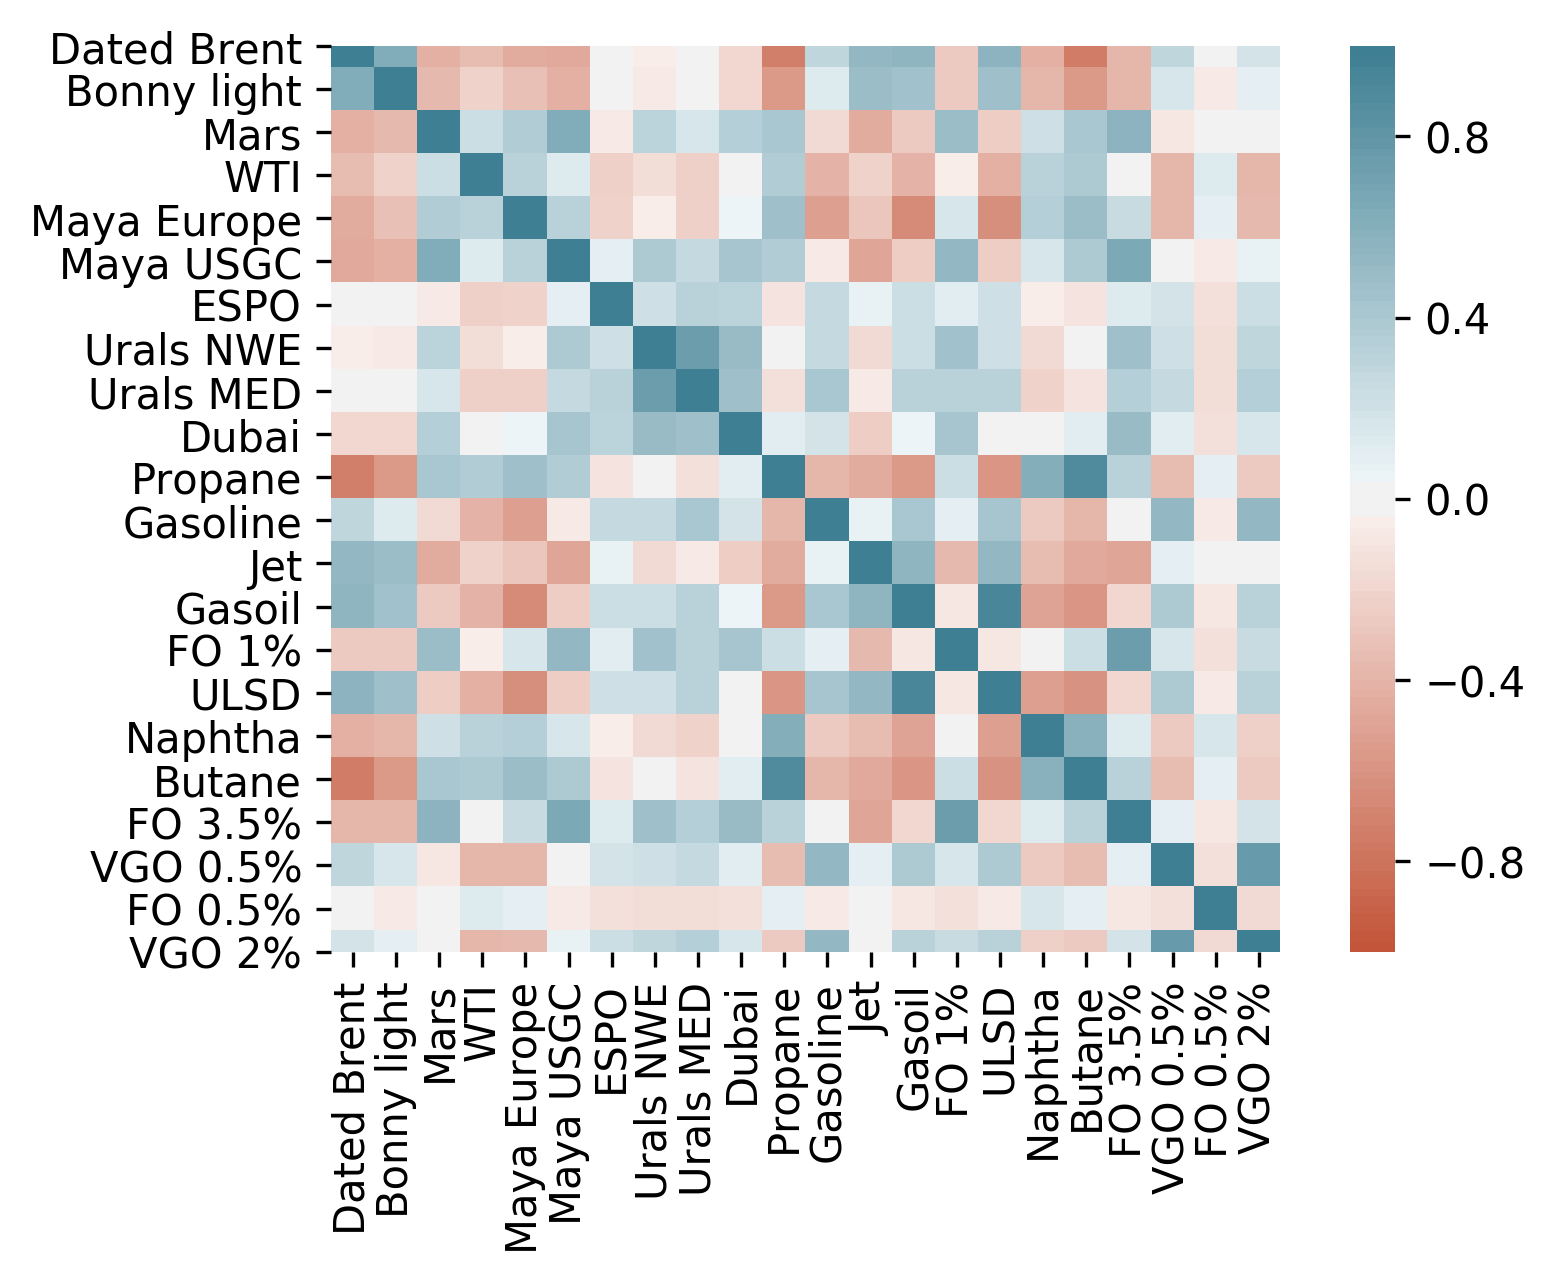

In [2]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data Preparation
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #pip install matplotlib if error



combi = pd.read_table('Historical combi.csv',delimiter =';')

combi=combi.fillna(0)
combi.dtypes
CO = combi.corr(method = 'kendall')
plt.rcParams['figure.dpi'] =300
ax = sns.heatmap(CO.iloc[0:,0:],vmin=-1, vmax=1, center=0,yticklabels=1,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True)



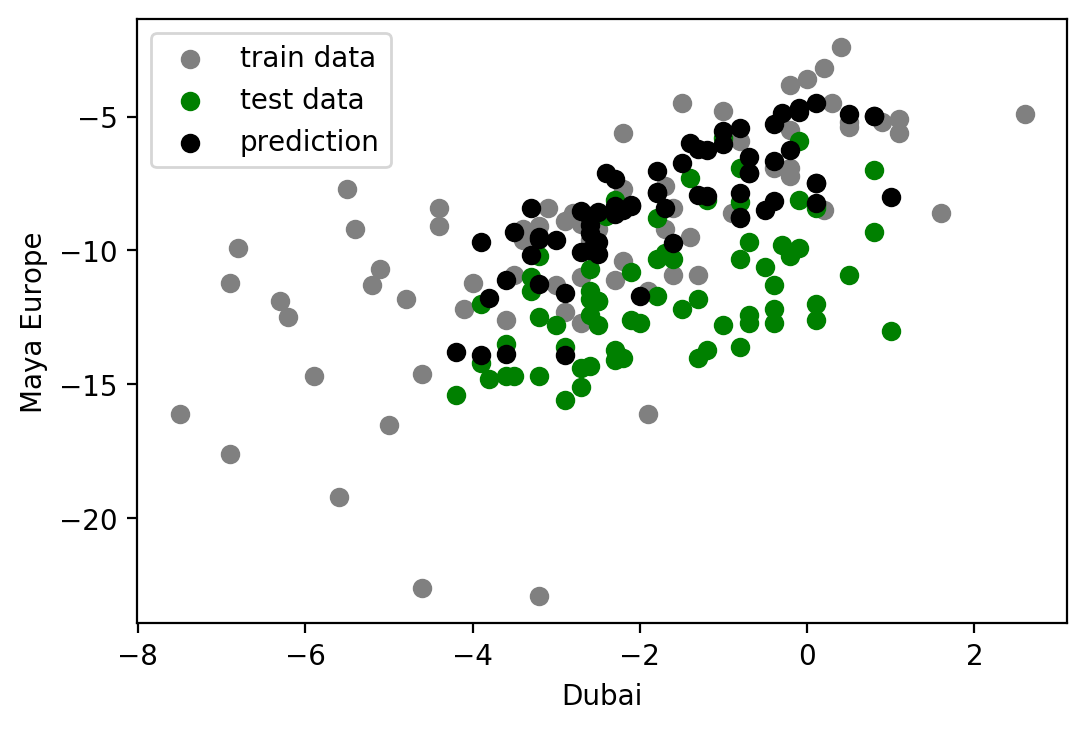

Mean squared error: 0.65
Feature ranking:
Feature Dubai (0.144526)
Feature FO 3.5% (0.855474)


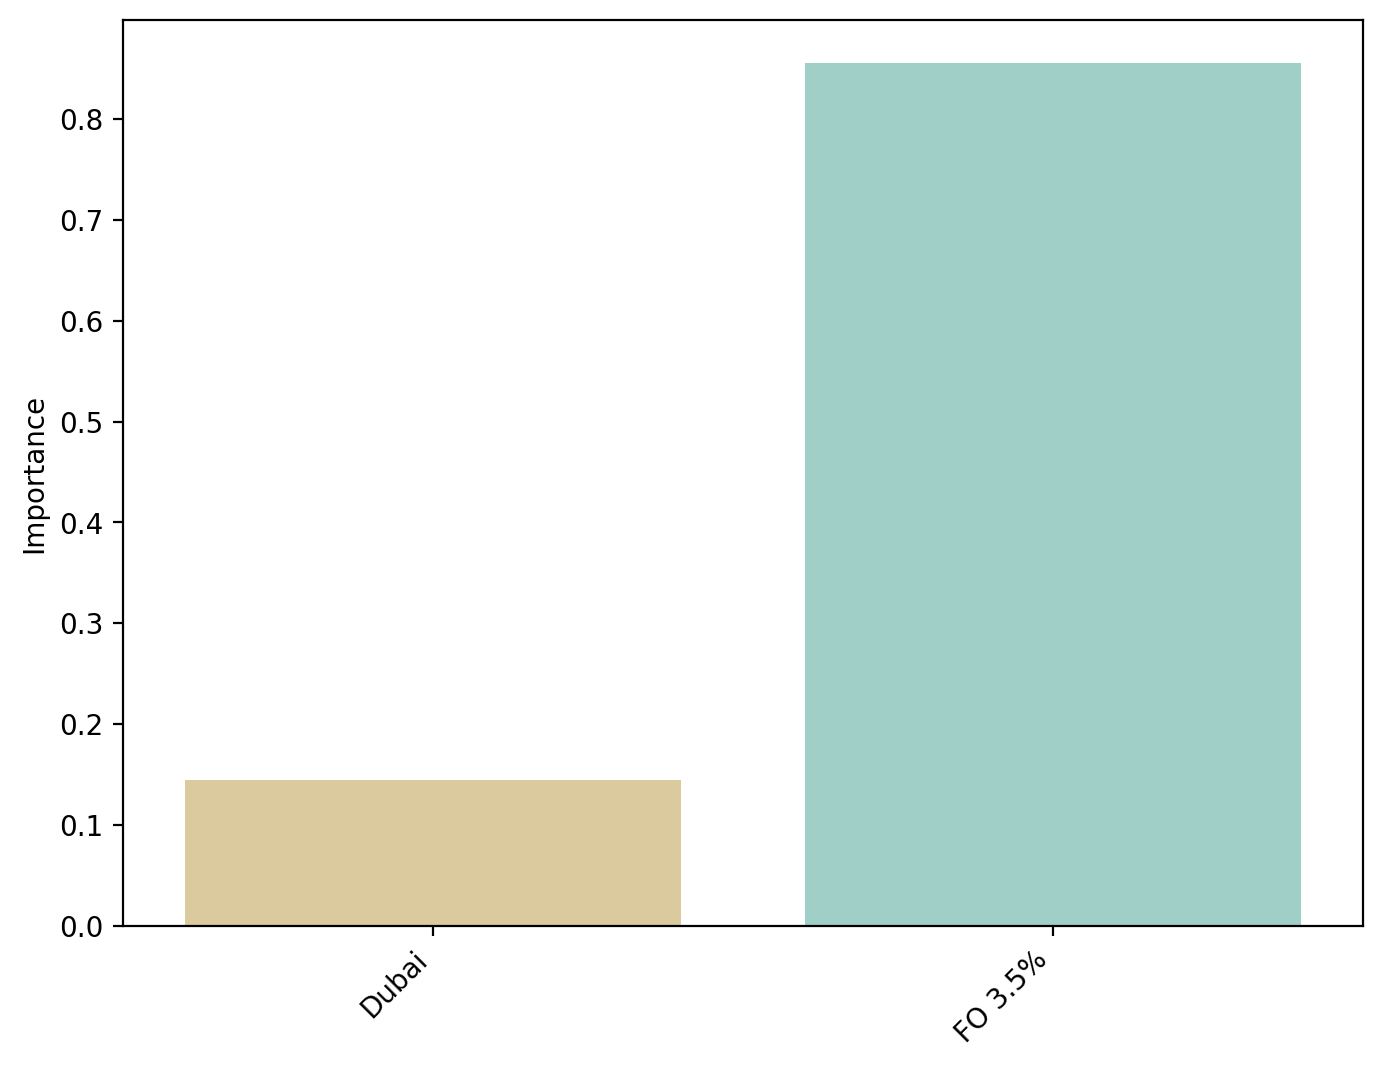

In [8]:
train_combi = combi.iloc[96:165,1:]
test_combi = combi.iloc[166:,1:]

plt.rcParams['figure.dpi'] = 200

#x_train=train_combi.drop("Maya Europe",axis=1)
#x_train=train_combi[train_combi.columns.difference(["Maya Europe","Maya USGC"])]
x_train=train_combi[["Dubai","FO 3.5%"]]
y_train=train_combi["Maya Europe"]

#df.drop('b', axis=1)

#x_test=train_combi.drop("Maya Europe",axis=1)
#x_test=test_combi[test_combi.columns.difference(["Maya Europe","Maya USGC"])]
x_test=test_combi[["Dubai","FO 3.5%"]]
y_test=test_combi["Maya Europe"].to_frame()



regressor = RandomForestRegressor(n_estimators=200, max_depth=5)

clf=regressor.fit(x_train, y_train)

y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)


plt_train=plt.scatter(x_train["Dubai"],y_train,   color='grey')
plt_test=plt.scatter(x_test["Dubai"],y_test,   color='green')
plt_pred=plt.scatter(x_test["Dubai"], y_pred,  color='black')



plt.xlabel("Dubai")
plt.ylabel("Maya Europe")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

import seaborn as sns
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="BrBG", ax=ax1)
ax1.set_ylabel("Importance")

ax1.set_xticklabels(
    ax1.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);